Importing the Dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

Saving insurance.csv to insurance (1).csv


Data Collection & Analysis

In [19]:
import io
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [20]:
#How big is data
df.shape

(1338, 7)

In [21]:
#How does data look like
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
369,18,male,30.400,3,no,northeast,3481.86800
599,52,female,37.525,2,no,northwest,33471.97189
516,20,male,35.310,1,no,southeast,27724.28875
1027,23,male,18.715,0,no,northwest,21595.38229
668,62,male,32.015,0,yes,northeast,45710.20785


In [22]:
#What is Dtype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
#How does data look mathematically
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
#Are there duplicated values
df.duplicated().sum()

1

In [25]:
#How is the correlation between columns
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [26]:
#Are there any missing values
df.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

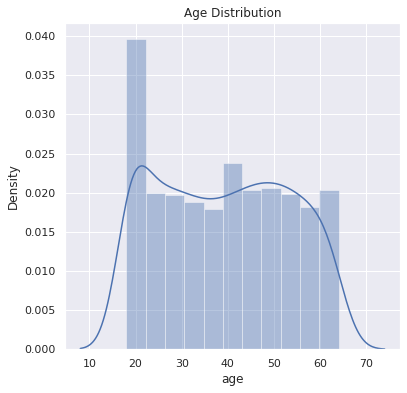

In [27]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [28]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

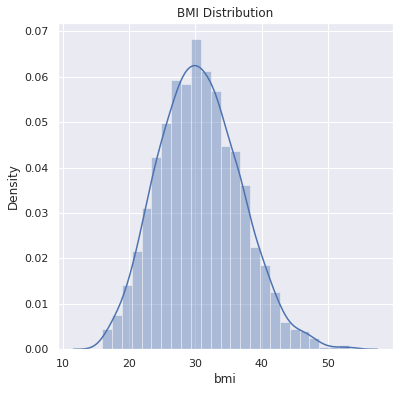

In [29]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

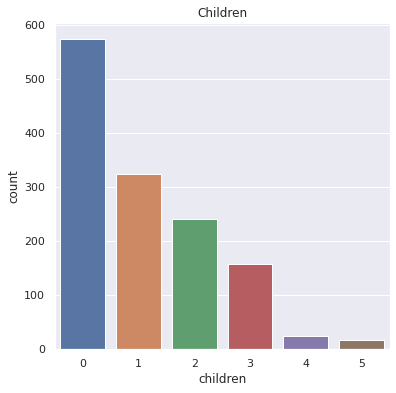

In [30]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [31]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

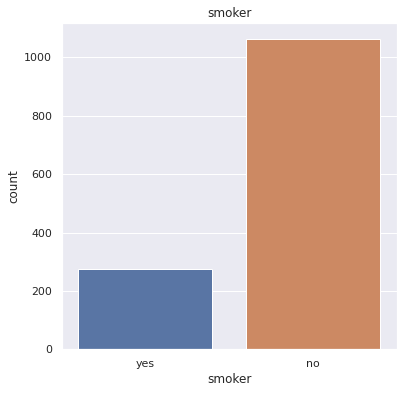

In [32]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [33]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

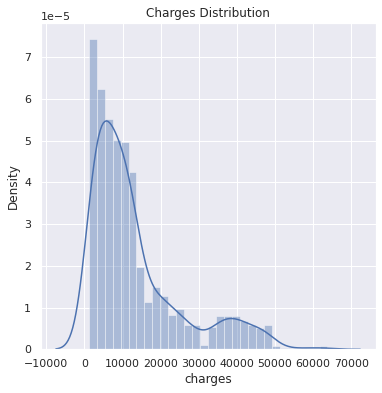

In [34]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

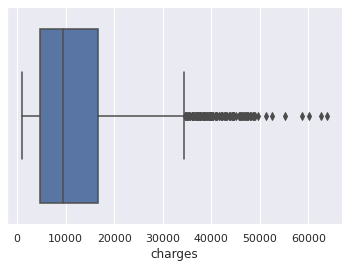

In [53]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot('charges', data=df)

In [54]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['charges']),
                                                 df['charges'],
                                                 test_size=0.2,
                                                random_state=42)

In [55]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

In [56]:
# train the model
trf2 = LinearRegression()

In [57]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [58]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('trf2', LinearRegression())])

In [59]:
# Predict
y_pred = pipe.predict(X_test)

In [63]:
# R squared value
r2_test = metrics.r2_score(y_test, y_pred)
print('R squared vale : ', r2_test)

R squared vale :  0.7835929767120723


In [84]:
# export 
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))


In [66]:
X_train_trans=trf1.fit_transform(X_train)

In [73]:
X_train_trans[0]

array([ 1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , 46.  ,
       19.95,  2.  ])

In [78]:
X_test ('50','male','25.175','2','no','northeast')

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast
